In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv("HW1_CarPrice.csv", )
df.info()#有沒有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
#敘述性統計
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


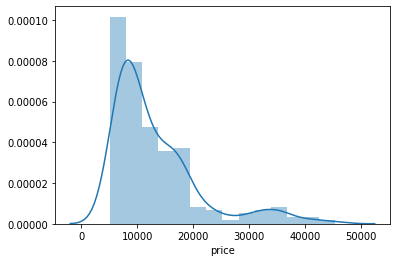

In [4]:
#查看價格常態分布
sns.distplot(df['price'])
plt.show()
#大部分在10000塊

In [5]:
#car_ID只是排序不會用到可以先刪除
df_new = df.drop(columns=["car_ID"])
df_new.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#資料可以分成數值跟分類兩種
df_numeric = df_new.select_dtypes(exclude=['object'])
df_categorical =df_new.select_dtypes(include=['object'])

,price
highwaympg,-0.697599
citympg,-0.685751
peakrpm,-0.085267
symboling,-0.079978
compressionratio,0.067984
stroke,0.079443
carheight,0.119336
boreratio,0.553173
wheelbase,0.577816
carlength,0.682920


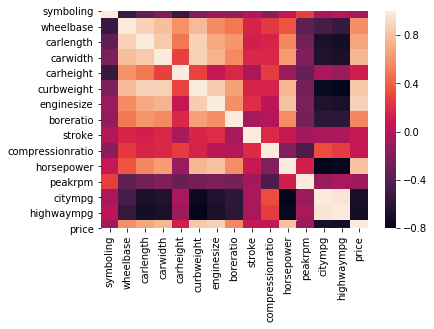

In [23]:
#看數值資料和價格的關聯
num_corr = df_numeric.corr()
sns.heatmap(num_corr)
corr = num_corr['price']
pd.DataFrame(corr).sort_values('price')

In [8]:
#整理分類資料
df_categorical.head()
df_categorical['CarName'].unique()#太多類，改用品牌區分
df_categorical['Carbrand'] = df_categorical['CarName'].str.split(' ',expand=True)[0]
df_categorical['Carbrand'].unique()

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#更正部分錯誤品牌
df_categorical['CarBrand'] = df_categorical['Carbrand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df_categorical['CarBrand'].unique()

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Text(0, 0.5, 'price')

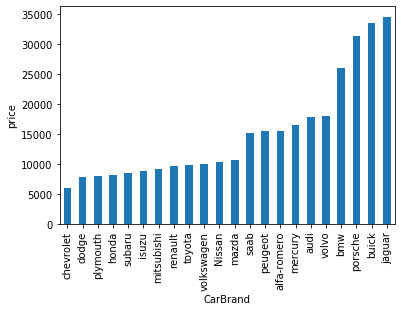

In [10]:
#品牌和其平均價格的關係
price = df['price'].to_frame()
cat_price = pd.concat([df_categorical,price],axis = 1)
df_cat_brand = cat_price.groupby(['CarBrand'])['price'].mean().sort_values()
t = df_cat_brand.plot.bar()
plt.ylabel('price')


In [11]:
df_categorical.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Carbrand,CarBrand
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,audi


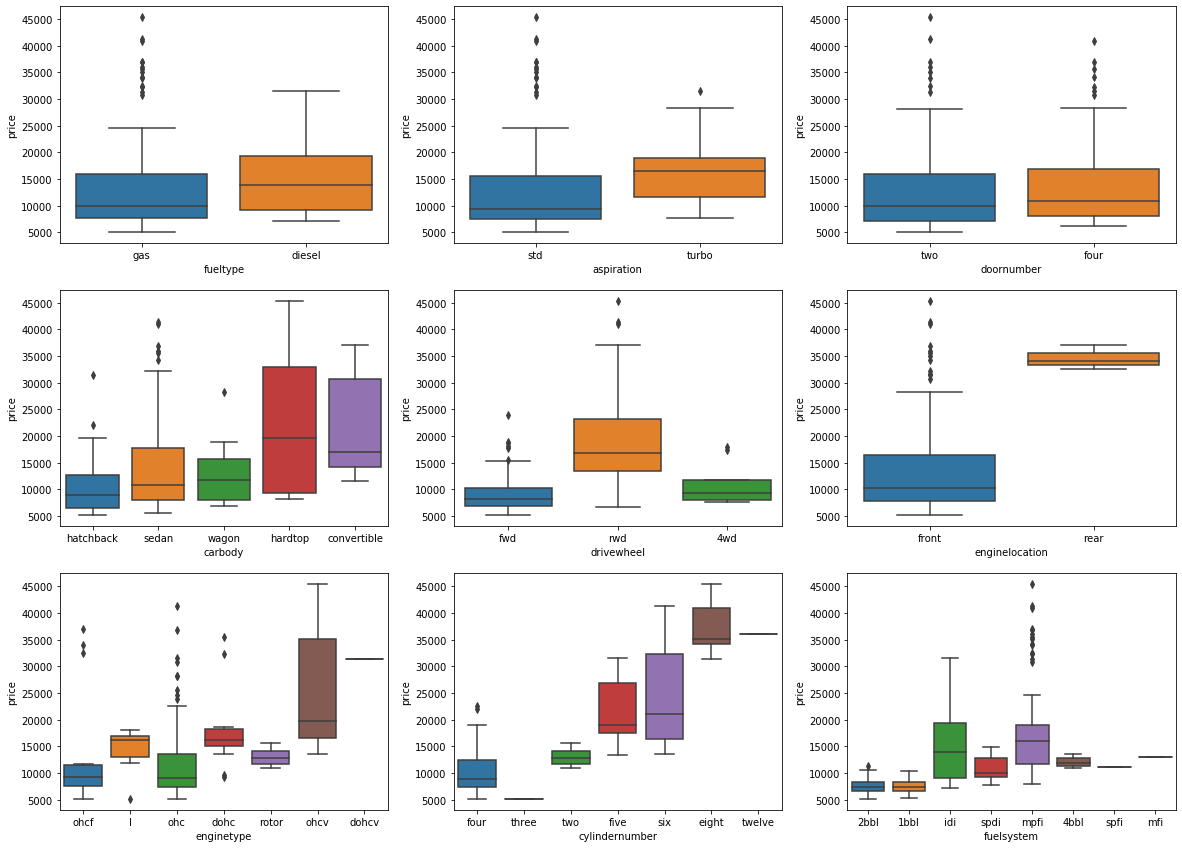

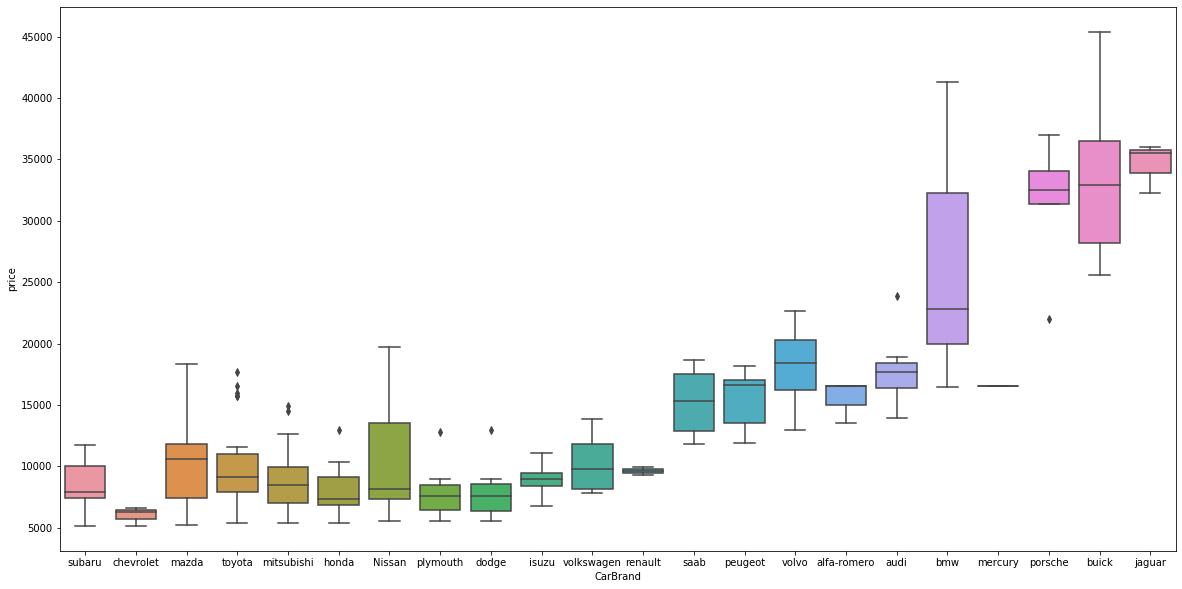

In [12]:
#分類資料和價格的關係
plt.figure(figsize=(20,20))
#使用柴油的價格大於使用汽油的價格，但最貴的車用汽油
plt.subplot(4, 3, 1) 
sns.boxplot(x = 'fueltype' , y = 'price',data = df.sort_values('price'))
#turbo價格高於std，但最貴的使用std
plt.subplot(4, 3, 2) 
sns.boxplot(x = 'aspiration' , y = 'price',data = df.sort_values('price'))
#車門好像沒有太大差異
plt.subplot(4, 3, 3) 
sns.boxplot(x = 'doornumber' , y = 'price',data = df.sort_values('price'))
#hardtop跟convertible比較貴
plt.subplot(4, 3, 4) 
sns.boxplot(x = 'carbody' , y = 'price',data = df.sort_values('price'))
#用rwd的最貴
plt.subplot(4, 3, 5) 
sns.boxplot(x = 'drivewheel' , y = 'price',data = df.sort_values('price'))
#用rear超貴
plt.subplot(4, 3, 6) 
sns.boxplot(x = 'enginelocation' , y = 'price',data = df.sort_values('price'))
#ohcv好貴
plt.subplot(4, 3, 7) 
sns.boxplot(x = 'enginetype' , y = 'price',data = df.sort_values('price'))
#正相關，越多越貴
plt.subplot(4, 3, 8) 
sns.boxplot(x = 'cylindernumber' , y = 'price',data = df.sort_values('price'))
#mpfi有些好像偏貴
plt.subplot(4, 3, 9) 
sns.boxplot(x = 'fuelsystem' , y = 'price',data = df.sort_values('price')) 
#感覺有一半品牌的價格在一萬左右
plt.figure(figsize=(20,10))
sns.boxplot(x = 'CarBrand' , y = 'price',data = cat_price.sort_values('price'))

In [13]:
#數值裡，可以去掉和價格負相關的；分類裡，可以去掉不大影響價格的
df_num_new = df_numeric.loc[:,['compressionratio','stroke','carheight','boreratio','wheelbase','carlength','carwidth','horsepower','curbweight','enginesize']]
df_cat_new = df_categorical.loc[:,['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','CarBrand']] 

In [14]:
#分類的部分變虛擬變數
dummies = pd.get_dummies(df_cat_new,drop_first=True)
dummies

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#和原本數值資料合併
X = pd.concat([df_num_new,dummies], axis=1)
Y = df['price']

In [16]:
#分訓練和測試
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, 
                                                    random_state= 0)

In [17]:
#線性回歸
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#預測
predict = model.predict(X_test)
#R square值
r2_score(y_true=Y_test, y_pred=predict)

0.8860126576923795

In [27]:
#RMSE,MAE
rmse = np.sqrt(metrics.mean_squared_error(Y_test,predict))
print("RMSE =",rmse)
mae = mean_absolute_error(Y_test,predict)
print("MAE =",mae)

#MAPE
def mape(Y_test,predict):
    return np.mean(np.abs((predict-Y_test)/Y_test))*100
print("MAPE =", mape(Y_test,predict))

RMSE = 2970.603461400065
MAE = 1844.9326324751416
MAPE = 13.524372410014069


Text(0.5, 0, 'Errors')

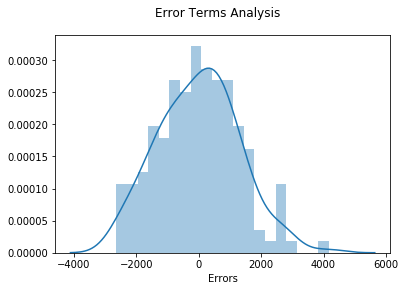

In [43]:
#殘差分析比較
Y_train_price = model.predict(X_train)
sns.distplot((Y_train - Y_train_price), bins = 20)
plt.suptitle('Error Terms Analysis')
plt.xlabel('Errors')

Text(0, 0.5, 'y_pred')

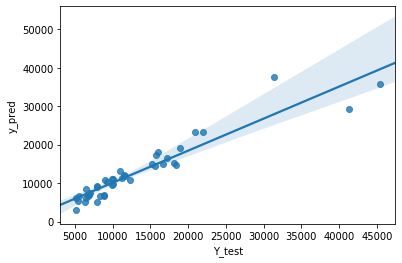

In [44]:
#散布圖
sns.regplot(Y_test,predict)
plt.xlabel('Y_test')                       
plt.ylabel('y_pred') 

In [38]:
#結論
print("訓練集上R^2 = {:.3f}".format(model.score(X_train, Y_train)))
print("測試集上R^2 = {:.3f}".format(model.score(X_test, Y_test)))

訓練集上R^2 = 0.972
測試集上R^2 = 0.886
